In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Unit 4/Quest_Unit4/portfolio_weights.csv")

In [ ]:
df_2=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Unit 4/Quest_Unit4/asset_information_data.csv")

In [ ]:
df_3=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Unit 4/Quest_Unit4/asset_price_data.csv")

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [3]:
#Loading the file
df_3=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Unit 4/Quest_Unit4/asset_price_data.csv")

In [5]:
#copy as best practice
asset_price_df=df_3.copy()

In [ ]:
#check the dataframe
asset_price_df.head()

In [ ]:
asset_price_df.info()

In [ ]:
asset_price_df.shape

In [ ]:
#check the null values
asset_price_df.isnull().sum()

In [ ]:
#check the data types
asset_price_df.dtypes

In [ ]:
#check the duplicates
asset_price_df.duplicated().sum()

In [ ]:
#check for empty spaces
asset_price_df.eq(" ").sum()

In [6]:
#standardize the name of the columns
asset_price_df.columns=[column.lower().replace(" ","_") for column in asset_price_df.columns]
asset_price_df

,date,asset1,asset2,asset3,asset4,asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


Text(0.5, 1.0, 'Asset Prices over Time')

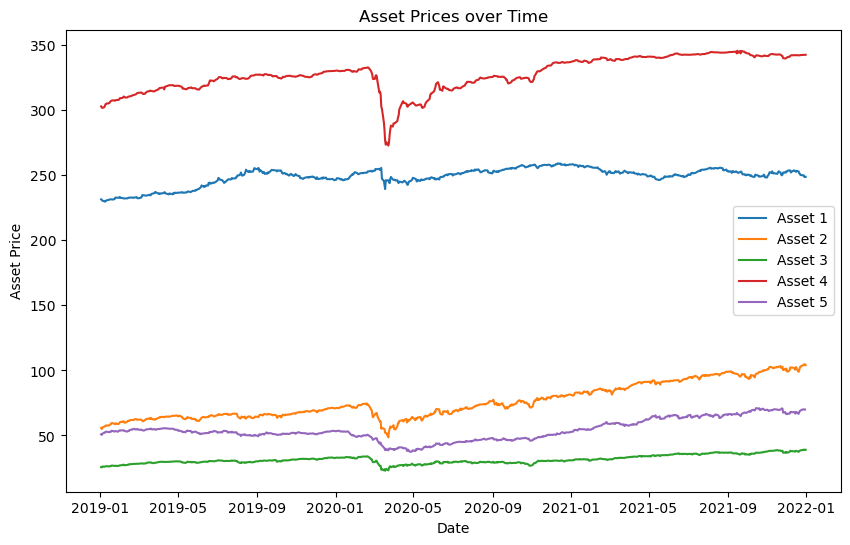

In [7]:
#visualize this data through a time series graph

import matplotlib.dates as mdates
plt.figure(figsize=(10, 6))

asset_price_df['date'] = pd.to_datetime(asset_price_df['date'])

sns.lineplot(data=asset_price_df, x='date', y="asset1", label="Asset 1", ci=None)
sns.lineplot(data=asset_price_df, x='date', y="asset2", label="Asset 2", ci=None)
sns.lineplot(data=asset_price_df, x='date', y="asset3", label="Asset 3", ci=None)
sns.lineplot(data=asset_price_df, x='date', y="asset4", label="Asset 4", ci=None)
sns.lineplot(data=asset_price_df, x='date', y="asset5", label="Asset 5", ci=None)

plt.xlabel("Date")
plt.ylabel("Asset Price")
plt.title("Asset Prices over Time")


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

In [ ]:
df_2=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Unit 4/Quest_Unit4/asset_information_data.csv")

In [ ]:
#copy as best practice
asset_information_df=df_2.copy()

In [ ]:
asset_information_df.head()

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [ ]:
#daily percentage returns for each financial asset is the difference between the value of the asset today and yesterday divide by the value of the asset yesterday.
#returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.
asset_price_df.set_index("date", inplace=True)
daily_return_asset_df = asset_price_df.pct_change() * 100

In [ ]:
daily_return_asset_df

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [ ]:
# Correlation Matrix-Heatmap Plot
num=daily_return_asset_df.select_dtypes(include="number")
num_corr=round(num.corr(),2)
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(8, 5))
sns.set(font_scale=1.25) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=15) # add title
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [ ]:
plt.title("Daily comparison of Asset 2 and 3")
sns.scatterplot(data=daily_return_asset_df, x="asset2", y='asset3')

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [8]:
df=pd.read_csv("/Users/carlotacarvalho/Desktop/Ironhack/Unit 4/Quest_Unit4/portfolio_weights.csv")

In [9]:
portfolio_df=df.copy()

In [10]:
portfolio_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [11]:
portfolio_df.shape

(783, 6)

In [12]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [29]:
portfolio_df.sort_values(by="date", inplace=True)
portfolio_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [30]:
#transforming date column to datetime
portfolio_df['date'] = pd.to_datetime(portfolio_df['date'])
portfolio_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [31]:
portfolio_df.set_index("date", inplace=True)
portfolio_df

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356


<Figure size 1200x800 with 0 Axes>

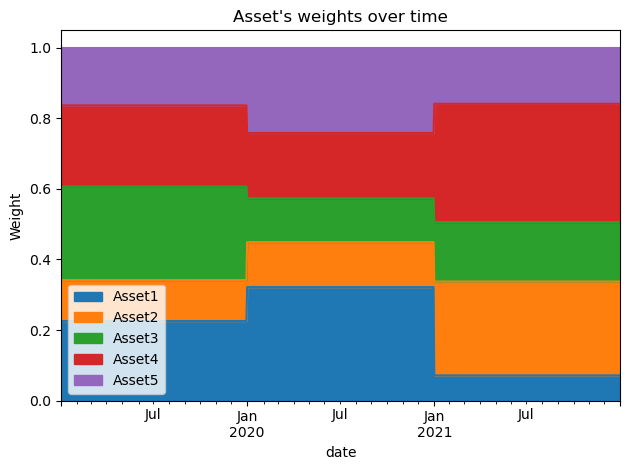

In [32]:
#plot the area chart
plt.figure(figsize=(12,8))
portfolio_df.plot.area()
plt.title("Asset's weights over time")
plt.ylabel("Weight")
plt.tight_layout() #Prevents overlapping

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [24]:
portfolio_df.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [46]:
df_3["date"] = pd.to_datetime(df_3["date"])
df["date"] = pd.to_datetime(df["date"])

In [48]:
data=df["date"]

In [49]:
df.drop(columns=["date"], inplace=True)
df_3.drop(columns=["date"], inplace=True)

In [52]:
df_12=df*daily_return_asset_df
df_12

NameError: name 'daily_return_asset_df' is not defined

In [25]:
asset_price_df.set_index("date", inplace=True)
asset_price_df.head(5)

,asset1,asset2,asset3,asset4,asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [13]:
portfolio_asset_df=pd.DataFrame()
portfolio_asset_df["Asset1"]=portfolio_df["Asset1"] * asset_price_df["asset1"]
portfolio_asset_df["Asset2"]=portfolio_df["Asset2"] * asset_price_df["asset2"]
portfolio_asset_df["Asset3"]=portfolio_df["Asset3"] * asset_price_df["asset3"]
portfolio_asset_df["Asset4"]=portfolio_df["Asset4"] * asset_price_df["asset4"]
portfolio_asset_df["Asset5"]=portfolio_df["Asset5"] * asset_price_df["asset5"]
portfolio_asset_df.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
0,52.194894,6.495737,6.797127,69.767682,8.293769
1,52.088816,6.391340,6.758390,69.578828,8.215541
2,51.946101,6.525266,6.929074,69.500523,8.373626
3,51.867574,6.607690,6.878232,69.629496,8.497487
4,51.787964,6.614317,6.926653,69.880533,8.495857


In [17]:
daily_return_portfolio_asset_df = portfolio_asset_df.pct_change()
daily_return_portfolio_asset_df

,Asset1,Asset2,Asset3,Asset4,Asset5
0,NaN,NaN,NaN,NaN,NaN
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,-0.001535,0.001003,0.007040,0.003605,-0.000192
...,...,...,...,...,...
778,-0.000913,0.007384,0.005439,0.000000,0.013443
779,0.000064,0.005483,0.007599,0.000000,-0.001141
780,-0.004862,-0.001588,-0.006647,0.000175,-0.003142
781,-0.000696,0.002903,0.003346,0.000263,0.001432


In [18]:
cumulative_return_df=daily_return_portfolio_asset_df.copy()
cumulative_return_df["date"]=portfolio_df["date"]
cumulative_return_df['date'] = pd.to_datetime(cumulative_return_df['date'])
cumulative_return_df["cumulative_asset1"]=0
cumulative_return_df["cumulative_asset2"]=0
cumulative_return_df["cumulative_asset3"]=0
cumulative_return_df["cumulative_asset4"]=0
cumulative_return_df["cumulative_asset5"]=0
cumulative_return_df.at[0,"cumulative_asset1"]=1
cumulative_return_df.at[0,"cumulative_asset2"]=1
cumulative_return_df.at[0,"cumulative_asset3"]=1
cumulative_return_df.at[0,"cumulative_asset4"]=1
cumulative_return_df.at[0,"cumulative_asset5"]=1
for i in range(1, len(cumulative_return_df)):
    cumulative_return_df.at[i, 'cumulative_asset1'] = cumulative_return_df.at[i-1, 'cumulative_asset1'] + cumulative_return_df.at[i, 'Asset1']
    cumulative_return_df.at[i, 'cumulative_asset2'] = cumulative_return_df.at[i-1, 'cumulative_asset2'] + cumulative_return_df.at[i, 'Asset2']
    cumulative_return_df.at[i, 'cumulative_asset3'] = cumulative_return_df.at[i-1, 'cumulative_asset3'] + cumulative_return_df.at[i, 'Asset3']
    cumulative_return_df.at[i, 'cumulative_asset4'] = cumulative_return_df.at[i-1, 'cumulative_asset4'] + cumulative_return_df.at[i, 'Asset4']
    cumulative_return_df.at[i, 'cumulative_asset5'] = cumulative_return_df.at[i-1, 'cumulative_asset5'] + cumulative_return_df.at[i, 'Asset5']
cumulative_return_df

,Asset1,Asset2,Asset3,Asset4,Asset5,date,cumulative_asset1,cumulative_asset2,cumulative_asset3,cumulative_asset4,cumulative_asset5
0,NaN,NaN,NaN,NaN,NaN,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432,2019-01-03,0.997968,0.983928,0.994301,0.997293,0.990568
2,-0.002740,0.020954,0.025255,-0.001125,0.019242,2019-01-04,0.995228,1.004883,1.019556,0.996168,1.009810
3,-0.001512,0.012632,-0.007338,0.001856,0.014792,2019-01-07,0.993716,1.017514,1.012219,0.998023,1.024602
4,-0.001535,0.001003,0.007040,0.003605,-0.000192,2019-01-08,0.992181,1.018517,1.019258,1.001629,1.024410
...,...,...,...,...,...,...,...,...,...,...,...
778,-0.000913,0.007384,0.005439,0.000000,0.013443,2021-12-27,0.728376,2.852562,1.293727,1.740696,1.486267
779,0.000064,0.005483,0.007599,0.000000,-0.001141,2021-12-28,0.728440,2.858045,1.301326,1.740696,1.485126
780,-0.004862,-0.001588,-0.006647,0.000175,-0.003142,2021-12-29,0.723578,2.856457,1.294679,1.740871,1.481985
781,-0.000696,0.002903,0.003346,0.000263,0.001432,2021-12-30,0.722882,2.859361,1.298025,1.741134,1.483417


In [20]:
cumulative_return_df["cumulative_portfolio"]=(cumulative_return_df["cumulative_asset1"]+cumulative_return_df["cumulative_asset2"]+cumulative_return_df["cumulative_asset3"]+cumulative_return_df["cumulative_asset4"]+cumulative_return_df["cumulative_asset5"])/5
cumulative_return_df

,Asset1,Asset2,Asset3,Asset4,Asset5,date,cumulative_asset1,cumulative_asset2,cumulative_asset3,cumulative_asset4,cumulative_asset5,cumulative_portfolio
0,NaN,NaN,NaN,NaN,NaN,2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432,2019-01-03,0.997968,0.983928,0.994301,0.997293,0.990568,0.992812
2,-0.002740,0.020954,0.025255,-0.001125,0.019242,2019-01-04,0.995228,1.004883,1.019556,0.996168,1.009810,1.005129
3,-0.001512,0.012632,-0.007338,0.001856,0.014792,2019-01-07,0.993716,1.017514,1.012219,0.998023,1.024602,1.009215
4,-0.001535,0.001003,0.007040,0.003605,-0.000192,2019-01-08,0.992181,1.018517,1.019258,1.001629,1.024410,1.011199
...,...,...,...,...,...,...,...,...,...,...,...,...
778,-0.000913,0.007384,0.005439,0.000000,0.013443,2021-12-27,0.728376,2.852562,1.293727,1.740696,1.486267,1.620326
779,0.000064,0.005483,0.007599,0.000000,-0.001141,2021-12-28,0.728440,2.858045,1.301326,1.740696,1.485126,1.622727
780,-0.004862,-0.001588,-0.006647,0.000175,-0.003142,2021-12-29,0.723578,2.856457,1.294679,1.740871,1.481985,1.619514
781,-0.000696,0.002903,0.003346,0.000263,0.001432,2021-12-30,0.722882,2.859361,1.298025,1.741134,1.483417,1.620964


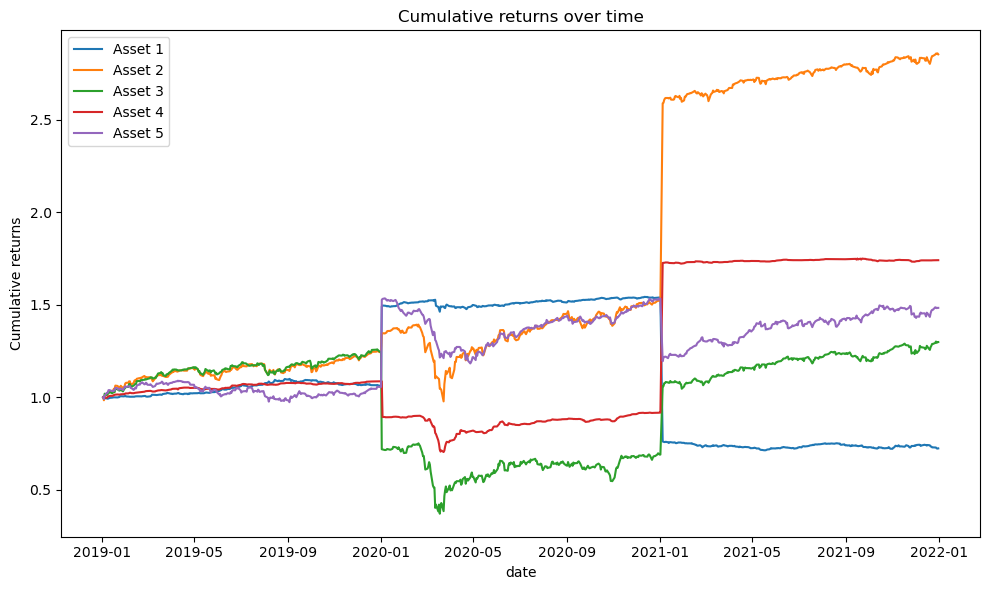

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumulative_return_df, x='date', y="cumulative_asset1", label="Asset 1", ci=None)
sns.lineplot(data=cumulative_return_df, x='date', y="cumulative_asset2", label="Asset 2", ci=None)
sns.lineplot(data=cumulative_return_df, x='date', y="cumulative_asset3", label="Asset 3", ci=None)
sns.lineplot(data=cumulative_return_df, x='date', y="cumulative_asset4", label="Asset 4", ci=None)
sns.lineplot(data=cumulative_return_df, x='date', y="cumulative_asset5", label="Asset 5", ci=None)
plt.title("Cumulative returns over time")
plt.ylabel("Cumulative returns")
plt.tight_layout()

<Axes: xlabel='date', ylabel='cumulative_portfolio'>

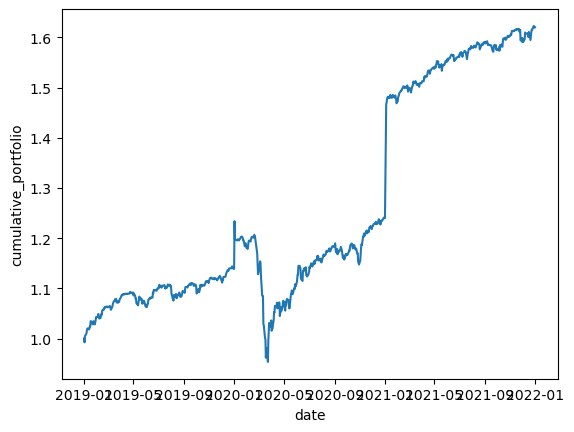

In [21]:
sns.lineplot(data=cumulative_return_df, x='date', y="cumulative_portfolio", ci=None)

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

Below I put two ways.. I think its the first one, but since it said the annualized return of the portfolio I got some doubts

In [33]:
annualized_returns = {}

# Iterate over each column (asset) in the portfolio DataFrame
for asset in portfolio_df.columns:
    # Get the value of the asset at the beginning and end of the period
    beginning_value_asset = portfolio_df[asset].iloc[0]  # Initial value of the asset
    ending_value_asset = portfolio_df[asset].iloc[-1]  # Final value of the asset

    # Calculate the number of years
    number_of_years = len(portfolio_df) / 261  # Assuming 261 trading days in a year

    # Calculate the annualized return (CAGR) for the asset
    annualized_return_asset = (ending_value_asset / beginning_value_asset) ** (1 / number_of_years) - 1

    # Store the annualized return for the asset in the dictionary
    annualized_returns[asset] = annualized_return_asset.round(2)

# Print the annualized returns for each asset
for asset, annualized_return_asset in annualized_returns.items():
    print(f"Annualized Return for {asset}: {annualized_return_asset}")

Annualized Return for Asset1: -0.32
Annualized Return for Asset2: 0.32
Annualized Return for Asset3: -0.14
Annualized Return for Asset4: 0.13
Annualized Return for Asset5: -0.01


In [34]:
# Compute the total return of the portfolio over the entire period
total_return = (portfolio_df.iloc[-1].sum() / portfolio_df.iloc[0].sum()) - 1

# Calculate the number of trading days in a year
trading_days_per_year = 261  # Assuming 261 trading days in a year

# Calculate the annualized return
annualized_return = (1 + total_return) ** (trading_days_per_year / len(portfolio_df)) - 1

print("Annualized Return of the Portfolio:")
print(annualized_return)

Annualized Return of the Portfolio:
0.0


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

Again some doubts here. Because our DataFrame is referring to 3 years so I think we should count that

In [35]:
# Compute daily returns
daily_returns = portfolio_df.pct_change()

# Calculate the standard deviation of daily returns
volatility = daily_returns.std()

# Annualize the standard deviation using 261 days as the annualization factor
annualized_volatility = volatility * np.sqrt(261)

print("Annualized Volatility of the Portfolio:")
print(annualized_volatility)

Annualized Volatility of the Portfolio:
Asset1    0.513205
Asset2    0.630135
Asset3    0.372035
Asset4    0.479345
Asset5    0.340748
dtype: float64


In [36]:
# Compute daily returns
daily_returns = portfolio_df.pct_change()

# Calculate the standard deviation of daily returns
volatility = daily_returns.std()

trading_days_per_year = 261  # Assuming 252 trading days in a year
years = 3  # Three-year period

# Adjust the annualization factor for the three-year period
annualization_factor = np.sqrt(trading_days_per_year * years)

# Annualize the standard deviation using 261 days as the annualization factor
annualized_volatility = volatility * annualization_factor

print("Annualized Volatility of the Portfolio:")
print(annualized_volatility)

Annualized Volatility of the Portfolio:
Asset1    0.888897
Asset2    1.091425
Asset3    0.644383
Asset4    0.830249
Asset5    0.590193
dtype: float64


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [ ]:
asset_information_df.head()

In [ ]:
portfolio_df.head()

In [ ]:
# Create a mapping dictionary from asset names to families or categories
asset_family_mapping = asset_information_df.set_index('Name')['Family'].to_dict()

# Group the asset weights by their families or categories using the mapping
grouped_weights = portfolio_df.groupby(asset_family_mapping, axis=1).sum()

# Plot an area chart for each family or category
plt.figure(figsize=(10, 6))

grouped_weights.plot.area()

plt.title("Asset Weights by Families or Categories")
plt.xlabel("Date")
plt.ylabel("Weight")

In [ ]:
asset_family_mapping

In [ ]:
grouped_weights